# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath = "C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/housing.csv"

# Using pandas library it enables us to read the csv file and store as a dataframe

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe 

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [4]:
data.shape

(20640, 9)

# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset

In [5]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used

In [6]:
data.dtypes

MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

# Based on all of the features if we assume to find clustering based on MEDIAN HOUSE VALUE, it will be most suitable to use MEDIAN INCOME, LATITUDE, LONGITUDE to check where majority of the expensive houses are located and based on what average income

In [7]:
home_data = pd.read_csv(filepath, usecols = ['Longitude', 'Latitude', 'MedInc', 'MedHouseVal'])
home_data.head()

,MedInc,Latitude,Longitude,MedHouseVal
0,8.3252,37.88,-122.23,4.526
1,8.3014,37.86,-122.22,3.585
2,7.2574,37.85,-122.24,3.521
3,5.6431,37.85,-122.25,3.413
4,3.8462,37.85,-122.25,3.422


# 2D graph initially to visualize based on LATITUDE and LONGITUDE how MEDIAN HOUSE VALUE is depicted... Initially we are plotting 5 different clusters without accounting for K value

<Axes: xlabel='Longitude', ylabel='Latitude'>

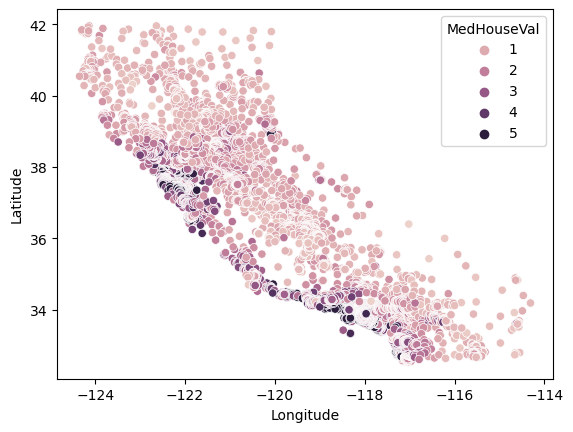

In [8]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

# Similar to previous graph but instead of a 2D plot visualization has extended onto 3D plot, where MEDIAN INCOME comes to play which directly implies that higher MEDIAN INCOME, based on LATITUDE and LONGITUDE, higher MEDIAN HOUSE VALUE

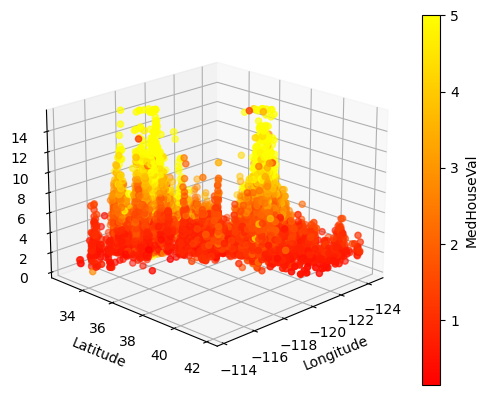

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=45)

# Plotting the data
scatter = ax.scatter(home_data['Longitude'], home_data['Latitude'], home_data['MedInc'], c=home_data['MedHouseVal'], cmap='autumn')

# Adding labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')

# Adding color bar
cbar = fig.colorbar(scatter)
cbar.set_label('MedHouseVal')

plt.show()

# Normalizing the values for better processing

In [10]:
from sklearn import preprocessing

X_norm = preprocessing.normalize(home_data[['Latitude', 'Longitude','MedInc']])

# Taking a range of K values from 2 to 12 to identify what is the optimal no. of clusters... Model is trained subsequently and Silhouette score is calculated for the given range of K values

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 12)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_norm, model.labels_, metric='euclidean'))

In [12]:
fits, score

([KMeans(n_clusters=2, n_init='auto', random_state=0),
  KMeans(n_clusters=3, n_init='auto', random_state=0),
  KMeans(n_clusters=4, n_init='auto', random_state=0),
  KMeans(n_clusters=5, n_init='auto', random_state=0),
  KMeans(n_clusters=6, n_init='auto', random_state=0),
  KMeans(n_clusters=7, n_init='auto', random_state=0),
  KMeans(n_init='auto', random_state=0),
  KMeans(n_clusters=9, n_init='auto', random_state=0),
  KMeans(n_clusters=10, n_init='auto', random_state=0),
  KMeans(n_clusters=11, n_init='auto', random_state=0)],
 [0.3922675988339368,
  0.4638400902896615,
  0.4468668478142712,
  0.4490899347776695,
  0.42841271765607924,
  0.43192843718550544,
  0.39497447075075864,
  0.3754426088794833,
  0.3949150102213663,
  0.3837595576381582])

# Plotting the Silhouette Graph and the best possible K value obtained is 3, but it has to correlated with Elbow Point Graph for confirmation

<Axes: >

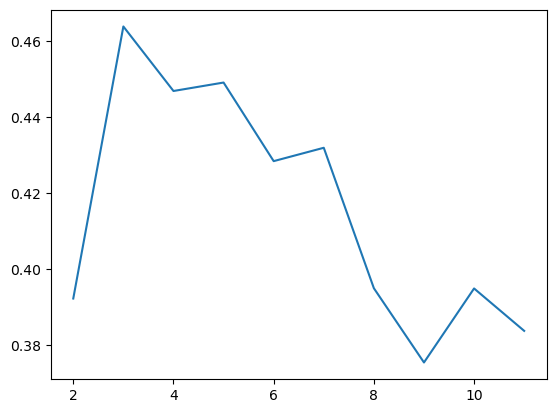

In [13]:
sns.lineplot(x = K, y = score)

# For finding the Elbow point graph, we find WCSS (Within Cluster Sum of Squares) and subsequently Elbow Point Graph where again optimal K value post which graph has almost same slope is 3

In [14]:
# finding wcss value for different number of clusters
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

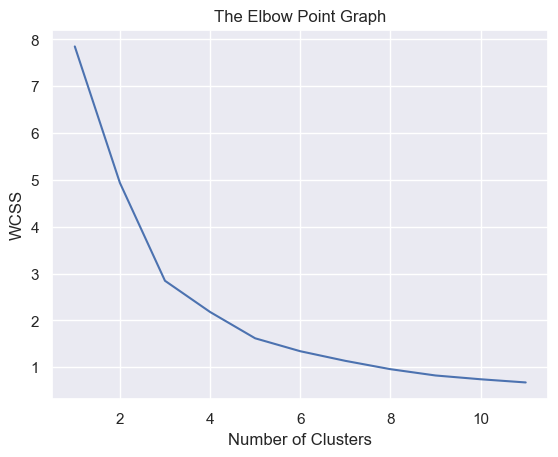

In [15]:
# plot an elbow graph

sns.set()
plt.plot(range(1,12), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# So based on optimal value of K = 3, we train the KMeans Clustering model, giving it normalized training set of values

In [16]:
# import Kmeans from sklearn

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

# We visualize the 2D plot based on 3 clusters as the model is trained on

<Axes: xlabel='Longitude', ylabel='Latitude'>

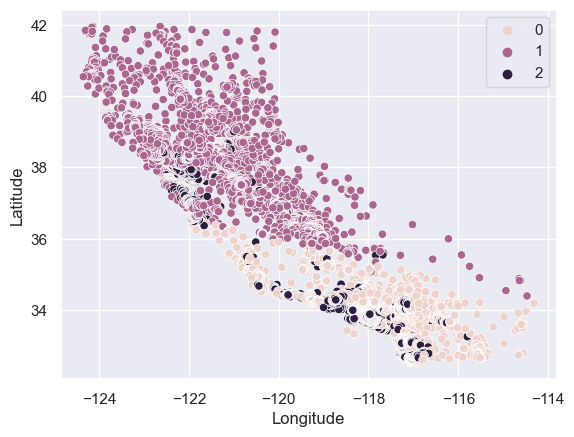

In [17]:
sns.scatterplot(data = home_data, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

# Similarly, the 3D plot is visualized giving us better representation of 3-clusters

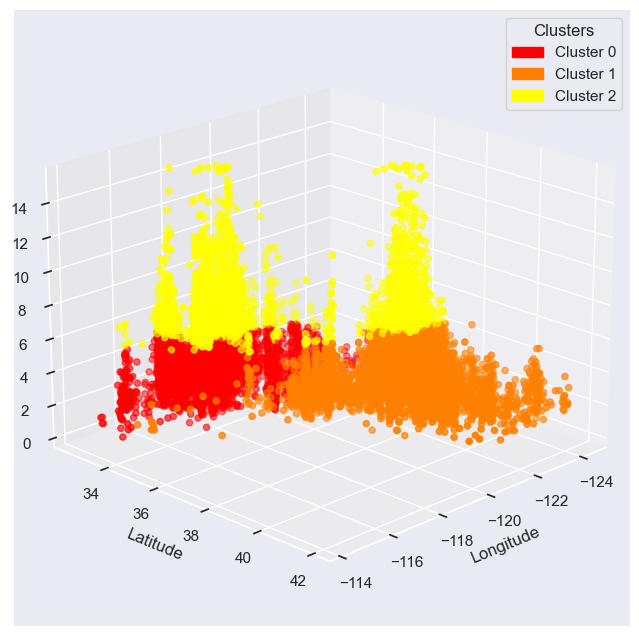

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=45)

# Plotting the data
scatter = ax.scatter(home_data['Longitude'], home_data['Latitude'], home_data['MedInc'], c=kmeans.labels_, cmap='autumn')

# Adding labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')

# Create legend showing the number of clusters
unique_labels = np.unique(kmeans.labels_)
legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}') for label in unique_labels]
ax.legend(handles=legend_handles, title='Clusters')

plt.show()

# Box Plot takes in parameters and creates a box plot that shows the distribution of the MEDIAN HOUSE VALUE for each cluster generated by the k-means algorithm

<Axes: ylabel='MedHouseVal'>

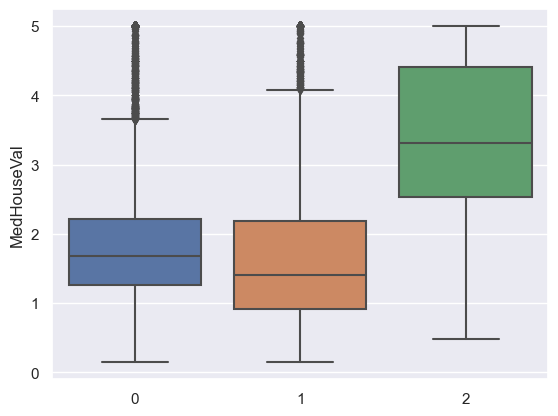

In [19]:
sns.boxplot(x = kmeans.labels_, y = home_data['MedHouseVal'])

# Finally, we check the Silhouette score which results the conclusion of KMeans Clustering as that is the optimal accuracy based on chosen values

In [20]:
silhouette_score(X_norm, kmeans.labels_, metric='euclidean')

0.4638400902896615

# Final Interpretation 

The Housing dataset which contains 20640 rows and 9 columns is used for KMeans Clustering model. The dataset is used as a whole but only specific features are interlinked to the clustering analysis. Since no empty or null values are present in the dataset, we move onto depicting the set of features for graphical representation too. Since focus is largely towards clustering and finding optimal number of clusters and its representation there is no requirement on splitting the dataset into training and testing parts. Elbow Point graph and Silhouette graph are both visualized to confirm the optimal K value, i.e., clusters that need to be found. The model has lesser Silhouette score value because we included one additional feature owing to Longitude and Latitude, else the score could've been slightly better.